# Binance Coin Price Prediction

In [1]:
import pandas as pd

In [7]:
from google.colab import files
import io

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['Binance.csv']))

Saving Binance.csv to Binance (1).csv


In [9]:
df.head()

,Date,Price(in dollars),Open,High,Low,Vol.,Change%
0,"Jul 27, 2021",303.29,304.31,307.62,298.53,2.26M,-0.33
1,"Jul 26, 2021",304.31,302.60,327.62,301.19,2.86M,0.58
2,"Jul 25, 2021",302.57,302.55,303.09,292.85,1.25M,-0.19
3,"Jul 24, 2021",303.15,298.91,305.01,296.16,1.81M,1.42
4,"Jul 23, 2021",298.89,293.51,301.15,281.68,1.98M,1.83


In [10]:
df.tail()

,Date,Price(in dollars),Open,High,Low,Vol.,Change%
1352,"Nov 13, 2017",1.68,1.49,1.74,1.49,166.01K,12.75
1353,"Nov 12, 2017",1.49,1.66,1.70,1.34,456.48K,-10.24
1354,"Nov 11, 2017",1.66,1.71,1.93,1.58,256.71K,-2.92
1355,"Nov 10, 2017",1.71,1.99,2.02,1.60,483.23K,-14.07
1356,"Nov 09, 2017",1.99,1.99,2.20,1.90,283.35K,0.00


In [12]:
df1=df.reset_index()['Price(in dollars)']

In [ ]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

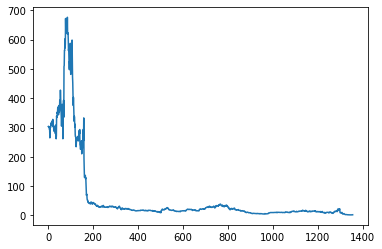

In [13]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [14]:
import numpy as np

In [15]:
df1

0       303.29
1       304.31
2       302.57
3       303.15
4       298.89
         ...  
1352      1.68
1353      1.49
1354      1.66
1355      1.71
1356      1.99
Name: Price(in dollars), Length: 1357, dtype: float64

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [17]:
print(df1)

[[4.47064749e-01]
 [4.48575703e-01]
 [4.45998193e-01]
 ...
 [2.51825737e-04]
 [3.25892130e-04]
 [7.40663931e-04]]


In [18]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [19]:
training_size,test_size

(882, 475)

In [20]:
train_data

array([[0.44706475],
       [0.4485757 ],
       [0.44599819],
       [0.44685736],
       [0.44054691],
       [0.43260699],
       [0.43194039],
       [0.38973736],
       [0.41326085],
       [0.44542047],
       [0.44265039],
       [0.44639815],
       [0.46527027],
       [0.45618973],
       [0.4554935 ],
       [0.46614425],
       [0.47460263],
       [0.46599612],
       [0.46703305],
       [0.45777475],
       [0.48319434],
       [0.47184736],
       [0.44561305],
       [0.45386404],
       [0.44108018],
       [0.42349682],
       [0.42386715],
       [0.4470055 ],
       [0.44201342],
       [0.42712608],
       [0.42865184],
       [0.41174989],
       [0.41423852],
       [0.45450101],
       [0.43647325],
       [0.38508599],
       [0.40041773],
       [0.50065919],
       [0.49283778],
       [0.49651147],
       [0.52016828],
       [0.51203579],
       [0.54111425],
       [0.54597301],
       [0.53970699],
       [0.50622898],
       [0.50953234],
       [0.518

In [21]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [22]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [23]:
print(X_train.shape), print(y_train.shape)

(781, 100)
(781,)


(None, None)

In [24]:
print(X_test.shape), print(ytest.shape)

(374, 100)
(374,)


(None, None)

In [25]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [26]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [27]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_5 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 9s 297ms/step - loss: 0.0073 - val_loss: 0.0012
Epoch 2/100
13/13 [==============================] - 3s 193ms/step - loss: 0.0022 - val_loss: 2.3827e-04
Epoch 3/100
13/13 [==============================] - 2s 191ms/step - loss: 0.0017 - val_loss: 7.4409e-05
Epoch 4/100
13/13 [==============================] - 2s 188ms/step - loss: 0.0010 - val_loss: 3.4896e-05
Epoch 5/100
13/13 [==============================] - 2s 192ms/step - loss: 8.9577e-04 - val_loss: 3.1117e-05
Epoch 6/100
13/13 [==============================] - 2s 191ms/step - loss: 9.7635e-04 - val_loss: 6.1944e-05
Epoch 7/100
13/13 [==============================] - 2s 193ms/step - loss: 9.5039e-04 - val_loss: 1.3691e-05
Epoch 8/100
13/13 [==============================] - 2s 190ms/step - loss: 0.0010 - val_loss: 2.3435e-04
Epoch 9/100
13/13 [==============================] - 2s 192ms/step - loss: 9.3120e-04 - val_loss: 5.4971e-05
Epoch 10/100
13/13 [=======================

In [30]:
import tensorflow as tf

In [31]:
tf.__version__

'2.6.0'

In [32]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [33]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [34]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

97.19787042299514

In [35]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

15.289044523554562

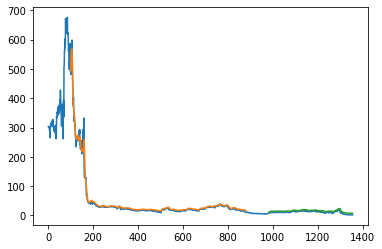

In [36]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()